# Batch Simulation

This notebook simulates answering multiple questions with automatic "novice" answers and collects evaluation metrics.

## Purpose

- Test the evaluation system at scale
- Analyze correlations between LLM scores and ROUGE metrics
- Identify patterns and potential issues
- Generate summary statistics


In [ ]:
# Load environment variables from .env file (if it exists)
# This allows notebooks to use the same configuration as the main app
try:
    from dotenv import load_dotenv
    load_dotenv()  # Loads variables from .env file in project root
    print("Environment variables loaded from .env file")
except ImportError:
    print("python-dotenv not installed. Using system environment variables only.")
except Exception as e:
    print(f"Note: Could not load .env file: {e}")
    print("Using system environment variables only.")


Environment variables loaded from .env file


In [ ]:
import sys
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Find project root by looking for src/ directory
current = Path.cwd()
project_root = None

# Check if we're in notebooks/ directory
if current.name == 'notebooks':
    project_root = current.parent
else:
    # Walk up the directory tree looking for src/ folder
    for parent in [current] + list(current.parents):
        if (parent / 'src').exists() and (parent / 'src' / '__init__.py').exists():
            project_root = parent
            break
    
    # Fallback: assume current directory is project root if src/ exists here
    if project_root is None and (current / 'src').exists():
        project_root = current

# If still not found, use current directory's parent
if project_root is None:
    project_root = current.parent if current.name == 'notebooks' else current

# Change to project root directory so relative paths work correctly
os.chdir(project_root)

# Add project root to path to import src modules
sys.path.insert(0, str(project_root))

from src.data_loader import load_qa_dataset, get_random_question
from src.evaluator import evaluate_answer
from src.llm_interface import generate_novice_answer

print("Modules imported successfully")
print(f"Current working directory: {os.getcwd()}")

Modules imported successfully
Current working directory: c:\Users\Levin\OneDrive\Desktop\DAI Assignment Part 2


In [ ]:
# Load dataset
df = load_qa_dataset()
print(f"Dataset loaded: {len(df)} questions")

# Select a subset for simulation (to save time)
num_simulations = min(5, len(df))  # Simulate 5 questions
print(f"Simulating {num_simulations} evaluations...")


INFO:src.data_loader:Successfully loaded 150 question-answer pairs from data\Q&A_db_practice.json


Dataset loaded: 150 questions
Simulating 5 evaluations...


In [ ]:
# Run batch simulation
results = []

for i in range(num_simulations):
    print(f"\nProcessing question {i+1}/{num_simulations}...")
    
    # Get a random question
    question_data = get_random_question(df)
    
    # Generate a novice answer
    print("  Generating novice answer...")
    try:
        novice_answer = generate_novice_answer(question_data['question'])
    except Exception as e:
        print(f"  Error generating answer: {e}")
        continue
    
    # Evaluate
    print("  Evaluating answer...")
    try:
        eval_result = evaluate_answer(
            question_id=question_data['id'],
            question=question_data['question'],
            reference_answer=question_data['answer'],
            student_answer=novice_answer,
            language="English"
        )
        
        results.append({
            'question_id': eval_result.question_id,
            'llm_score': eval_result.llm_score,
            'rouge_1': eval_result.rouge_1,
            'rouge_l': eval_result.rouge_l,
            'answer_length': len(novice_answer),
        })
        
        print(f"  Score: {eval_result.llm_score}/100, ROUGE-1: {eval_result.rouge_1:.3f}")
    except Exception as e:
        print(f"  Error evaluating: {e}")
        continue

print(f"\nCompleted {len(results)} evaluations")



Processing question 1/5...
  Generating novice answer...


INFO:src.llm_interface:Initialized OpenAI client
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:src.evaluator:Evaluating answer for question ID: 107


  Evaluating answer...


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:src.evaluator:Parsed LLM score: 5/100
INFO:src.evaluator:Loading ROUGE metric...
INFO:src.evaluator:ROUGE metric loaded
INFO:absl:Using default tokenizer.
INFO:src.evaluator:ROUGE-1: 0.338, ROUGE-L: 0.254


  Score: 5/100, ROUGE-1: 0.338

Processing question 2/5...
  Generating novice answer...


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:src.evaluator:Evaluating answer for question ID: 141


  Evaluating answer...


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:src.evaluator:Parsed LLM score: 5/100
INFO:absl:Using default tokenizer.
INFO:src.evaluator:ROUGE-1: 0.295, ROUGE-L: 0.228


  Score: 5/100, ROUGE-1: 0.295

Processing question 3/5...
  Generating novice answer...


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:src.evaluator:Evaluating answer for question ID: 143


  Evaluating answer...


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:src.evaluator:Parsed LLM score: 70/100
INFO:absl:Using default tokenizer.
INFO:src.evaluator:ROUGE-1: 0.248, ROUGE-L: 0.149


  Score: 70/100, ROUGE-1: 0.248

Processing question 4/5...
  Generating novice answer...


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:src.evaluator:Evaluating answer for question ID: 132


  Evaluating answer...


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:src.evaluator:Parsed LLM score: 65/100
INFO:absl:Using default tokenizer.
INFO:src.evaluator:ROUGE-1: 0.325, ROUGE-L: 0.183


  Score: 65/100, ROUGE-1: 0.325

Processing question 5/5...
  Generating novice answer...


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:src.evaluator:Evaluating answer for question ID: 142


  Evaluating answer...


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:src.evaluator:Parsed LLM score: 5/100
INFO:absl:Using default tokenizer.
INFO:src.evaluator:ROUGE-1: 0.261, ROUGE-L: 0.174


  Score: 5/100, ROUGE-1: 0.261

Completed 5 evaluations


In [ ]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
print("Results Summary:")
print(results_df.describe())


Results Summary:
       question_id  llm_score   rouge_1   rouge_l  answer_length
count     5.000000   5.000000  5.000000  5.000000         5.0000
mean    133.000000  30.000000  0.293401  0.197425       570.6000
std      15.182226  34.278273  0.039087  0.042514        54.7613
min     107.000000   5.000000  0.247934  0.148760       507.0000
25%     132.000000   5.000000  0.260870  0.173913       536.0000
50%     141.000000   5.000000  0.295302  0.182741       560.0000
75%     142.000000  65.000000  0.324873  0.228188       606.0000
max     143.000000  70.000000  0.338028  0.253521       644.0000



Correlation Matrix:
           llm_score   rouge_1   rouge_l
llm_score   1.000000 -0.199105 -0.693777
rouge_1    -0.199105  1.000000  0.763841
rouge_l    -0.693777  0.763841  1.000000


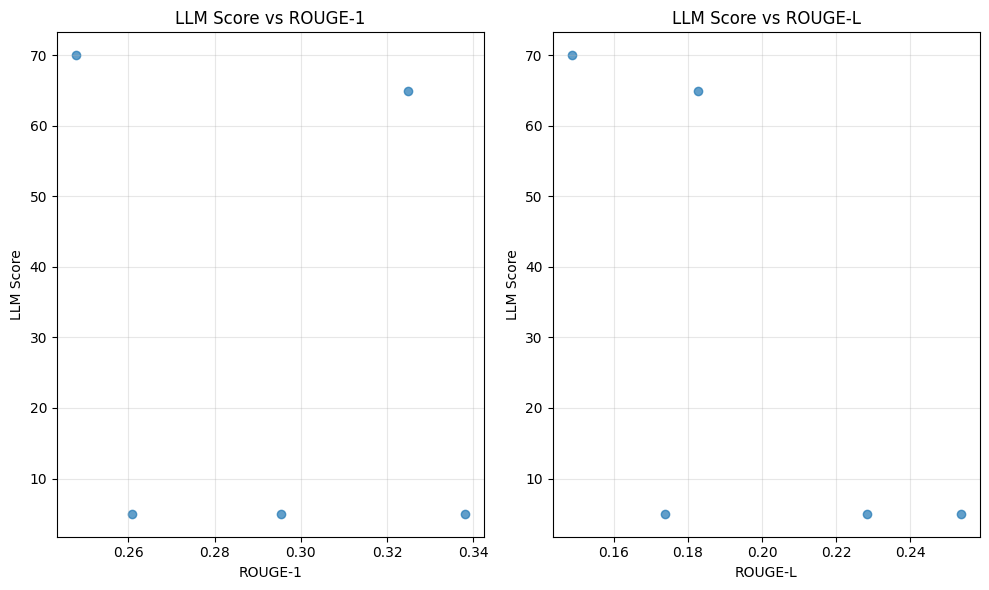

In [ ]:
# Analyze correlations
if len(results_df) > 1:
    correlation = results_df[['llm_score', 'rouge_1', 'rouge_l']].corr()
    print("\nCorrelation Matrix:")
    print(correlation)
    
    # Plot correlations
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(results_df['rouge_1'], results_df['llm_score'], alpha=0.7)
    plt.xlabel('ROUGE-1')
    plt.ylabel('LLM Score')
    plt.title('LLM Score vs ROUGE-1')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.scatter(results_df['rouge_l'], results_df['llm_score'], alpha=0.7)
    plt.xlabel('ROUGE-L')
    plt.ylabel('LLM Score')
    plt.title('LLM Score vs ROUGE-L')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data for correlation analysis")


## Discussion

### Correlation Between LLM Score and ROUGE

- **ROUGE metrics** measure lexical overlap (n-gram matching)
- **LLM scores** capture semantic understanding and correctness
- **Expected relationship**: Generally positive correlation, but not perfect
  - High ROUGE usually means high LLM score (good overlap)
  - Low ROUGE might still get decent LLM score if semantically correct
  - LLM can identify correctness even with different wording

### Strengths of This Approach

1. **Comprehensive**: Combines semantic (LLM) and lexical (ROUGE) evaluation
2. **Explainable**: LLM provides detailed feedback
3. **Flexible**: Can handle various answer styles and lengths

### Weaknesses

1. **Computational Cost**: LLM inference is slower than pure metrics
2. **Consistency**: LLM scores may vary slightly between runs
3. **Bias**: LLM may have inherent biases in evaluation
4. **ROUGE Limitations**: Doesn't capture semantic similarity well

### Ideas for More Robust Evaluation

1. **Separate Judge LLM**: Use a specialized model trained for evaluation
2. **Multi-model Ensemble**: Combine scores from multiple LLMs
3. **Fine-tuning**: Fine-tune the evaluator on human-graded examples
4. **Structured Output**: Use JSON/structured formats for more reliable parsing
5. **Aspect-based Scoring**: Break down into accuracy, completeness, clarity
6. **Human-in-the-loop**: Use LLM as initial filter, human for edge cases
